보험 분야에서 컴퓨터 비전이 활용될 수 있는데 보험에 들기 전 고객이 가입한 건물에 대해 조사를 할 경우에 쓰일 수 있습니다.
금융 분야의 또 다른 컴퓨터 비전 적용의 예로 은행의 신원 확인 절차를 자동화할 수 있습니다. 증권 쪽에선 컴퓨터 비전이 캔들스틱 차트의 새로운 패턴을 찾는 기술적 분석으로 쓰일 수 있습니다. 

이번 챕터에서 다루는 토픽
1. Convolutional layers
2. Padding
3. Pooling
4. Regularization to prevent overfitting
5. Momentum-based optimization
6. Batch normalization
7. Advanced architectures for computer vision beyond classfication
8. A note on libraries

## Convolution Neural Networks
Convolution Neural Networks 또는 ConvNets, CNN이라고 불리는데 컴퓨터 비전을 작동시키는 엔진입니다. ConvNets은 사이즈가 큰 이미지를 합리적인 신경망의 사이즈를 유지하면서 다룰 수 있게 해줍니다.

Convolution Neural Networks의 이름은 수학적 동작 원리에서 왔는데 일반적인 신경망과의 차이점에서 볼 수 있습니다. Convolution은 수학적인 용어인데 행렬에서 다른 행렬을 슬라이딩하는 것을 말합니다. 

ConvNets을 만들어 MNIST 데이터를 분류 해보겠습니다.

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 데이터 셋은 6만여개의 28*28 픽셀의 이미지를 포함하고 있다. mnist 데이터는 black and white로 구성되어 있다.

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
# one-color 채널을 추가
import numpy as np
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape


(60000, 28, 28, 1)

In [4]:
from keras.layers import Conv2D
from keras.models import Sequential

In [5]:
model = Sequential()
img_shape = (28, 28, 1)
model.add(Conv2D( filters = 6,
                  kernel_size = 3,
                  strides = 1,
                  padding = 'valid',
                  input_shape = img_shape))

### Kernel size
filter의 사이즈를 kernel_size라고도 부릅니다. 숫자 하나만 지정할 경우 keras에서 스퀘어로 인식합니다. 위 예에서 3을 넣었는데 3*3으로 인식합니다. (3, 4)를 입력으로 주면 3*4를 커널 사이즈로 인식합니다. 

### Stride size
Stride size는 컨볼루션 필터가 이미지 밖으로 얼마나 나갈지 정합니다. 커널 사이즈와 마찬가지로 값 하나만 설정할 경우 수직과 수평의 stride size를 같은 값으로 설정합니다. 그러나 (1, 2)와 같이 입력을 주어 설정할 수도 있습니다.

### Padding 
padding은 zero를 이미지 주변에 감싸는 것입니다.

### ReLU activation
합성곱 신경망은 선형 스텝만 수행합니다. 필터와 이미지를 곱하는 것은 선형 작업입니다. 
complex function을 approximate하기 위해선 비선형 활성화 함수가 필요합니다. 컴퓨터 비전에서 가장 가주사용하는 활성화 함수로 Rectified Linear Units, ReLU가 있습니다.

$ReLU(x) = max(x, 0)$

렐루 함수는 음수의 모든 값을 0으로 바꾸기 때문에 계산량이 다른 활성화 함수보다 적습니다. gradient 즉 기울기가 매우 크고 음의 방향으로 가중치가 곱해질 때 ReLU의 미분은 항상 0입니다. 그래서 가중치가 절대 업데이트되지 않습니다. 이것은 뉴런이 활성화되지 않을 수 있다는 것을 의미하는데 learning rate를 작게함으로써 완화시킬 수 있습니다.

렐루 함수는 빠르고 계산량이 저렴하기 때문에 많은 실무자들의 디폴트 활성화 함수입니다. 

케라스에서 렐루 함수를 쓰는 방법입니다.

In [6]:
from keras.layers import Activation
model.add(Activation('relu'))

### MaxPooling2D
convolutional layer 다음에 pooling layer를 두는 것은 흔한 관행입니다. Pooling은 feature map의 spatial size를 감소시키는데, 파라미터의 개수를 감소시키는 것으로 볼 수 있고 오버피팅을 방지합니다. 

맥스 풀링은 플에서 가장 큰 값을 반환합니다. AveragePooling2D는 풀의 평균값을 반환합니다. 맥스풀링은 평균풀링보다 우수한 성능을 종종 주기 때문에 표준으로 쓰입니다. 

In [7]:
from keras.layers import MaxPool2D
model.add(MaxPool2D(pool_size = 2, strides = None , padding='valid'))

### Flatten
우리의 feature map은 3차원이지만 10개의 클래스에 대한 확률을 가진 1차원의 벡터를 원합니다. 어떻게 3D를 1D로 바꿀까요? Flatten이 바꿉니다.
넘파이의 Flatten과 비슷하게 작동합니다. (batch_size, height, width, channels)를 취하고 (batch_size, height * width * channels)를 반환합니다. 

계산없이 행렬을 reshape할 뿐입니다. 그래서 하이퍼파라미터가 없습니다. 

In [8]:
from keras.layers import Flatten
model.add(Flatten())

### Dense

ConvNet은 보통 feature extraction part, convolutional layers, classification part로 구성되어 있습니다. plain layer와 모든 다른 타입의 layer를 구별하기 위해 우리는 Dense 레이어라고 그들을 부릅니다. 덴스 레이러는 각 입력 뉴런은 출력 뉴런과 연결되어 있습니다. 우리는 10개의 숫자로 아웃풋을 특정화해야 합니다.

아래의 코드로 합니다.

In [9]:
from keras.layers import Dense
model.add(Dense(10))

덴스 레이어 후에 멀티 클래스 회귀를 위해 softmax 활성화 함수를 추가합니다.

In [10]:
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1014)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10150     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 10,210
Trainable params: 10,210
Non-trainable params: 0
____________________________________________________

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
y_train.shape

(60000,)

타켓을 원 핫 인코딩 형식으로 변형 시켜 손실 함수를 계산하기 위해 sparse_categorical_crossentropy 손실 함수를 제공합니다. 
크로스 엔트로피 손실 함수와 같은데 sparse에 쓰인다는 점이 다릅니다. 

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [15]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7565 - acc: 0.8977 - val_loss: 0.2495 - val_acc: 0.9527
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1706 - acc: 0.9586 - val_loss: 0.1286 - val_acc: 0.9633
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1058 - acc: 0.9689 - val_loss: 0.1133 - val_acc: 0.9690
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0903 - acc: 0.9717 - val_loss: 0.1094 - val_acc: 0.9675
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0794 - acc: 0.9751 - val_loss: 0.1017 - val_acc: 0.9708
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0731 - acc: 0.9769 - val_loss: 0.1024 - val_acc: 0.9713
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0669 - acc: 0.9794 - val_loss: 0.1053 - val_acc: 0.9719
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

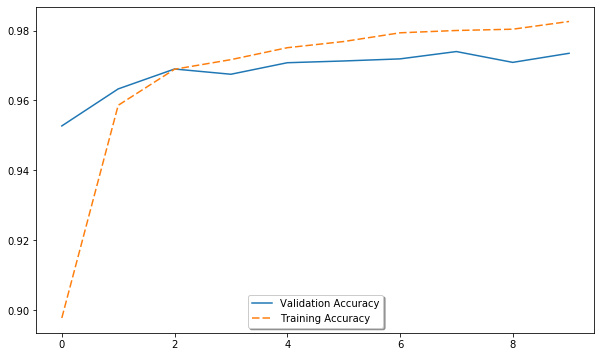

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()

In [18]:
history.history

{'loss': [1.7564914226531982,
  0.17063270509243011,
  0.10579264163970947,
  0.0903123989701271,
  0.07935269922018051,
  0.07313300669193268,
  0.06687050312757492,
  0.061809785664081573,
  0.05921204015612602,
  0.057056695222854614],
 'acc': [0.8977000117301941,
  0.9585999846458435,
  0.9689333438873291,
  0.9716833233833313,
  0.9750999808311462,
  0.9768666625022888,
  0.979366660118103,
  0.9800333380699158,
  0.980400025844574,
  0.982616662979126],
 'val_loss': [0.24953195452690125,
  0.1285695731639862,
  0.11332876235246658,
  0.10941430926322937,
  0.10165753215551376,
  0.10240443050861359,
  0.10530485957860947,
  0.09713193029165268,
  0.11537721008062363,
  0.11145763844251633],
 'val_acc': [0.9527000188827515,
  0.9632999897003174,
  0.968999981880188,
  0.9674999713897705,
  0.97079998254776,
  0.9713000059127808,
  0.9718999862670898,
  0.9739999771118164,
  0.9708999991416931,
  0.9735000133514404]}